# Importing Data

In [1]:
import pandas as pd

In [2]:
score_card=pd.read_csv("/kaggle/input/cricket-data/Scorecard.csv")
info_card=pd.read_csv("/kaggle/input/cricket-data/Infocard.csv")

In [3]:
info_card.head()

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,...,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome
0,0,1000887,Australia,Pakistan,male,2017/01/13,2016/17,Pakistan in Australia ODI Series,1.0,"""Brisbane Cricket Ground",...,MD Martell,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,92.0,NaN,NaN,NaN
1,1,1000889,Australia,Pakistan,male,2017/01/15,2016/17,Pakistan in Australia ODI Series,2.0,Melbourne Cricket Ground,...,CB Gaffaney,P Wilson,SJ Nogajski,C Shamshuddin,JJ Crowe,Pakistan,NaN,6.0,NaN,NaN
2,2,1000891,Australia,Pakistan,male,2017/01/19,2016/17,Pakistan in Australia ODI Series,3.0,Western Australia Cricket Association Ground,...,SD Fry,C Shamshuddin,P Wilson,CB Gaffaney,JJ Crowe,Australia,NaN,7.0,NaN,NaN
3,3,1000893,Australia,Pakistan,male,2017/01/22,2016/17,Pakistan in Australia ODI Series,4.0,Sydney Cricket Ground,...,CB Gaffaney,MD Martell,P Wilson,C Shamshuddin,JJ Crowe,Australia,86.0,NaN,NaN,NaN
4,4,1000895,Australia,Pakistan,male,2017/01/26,2016/17,Pakistan in Australia ODI Series,5.0,Adelaide Oval,...,SD Fry,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,57.0,NaN,NaN,NaN


In [4]:
score_card.head()

,Unnamed: 0,Match_id,Innings,Player_name,Batting_number,Over_start_number,Runs_Scored,Balls_faced,Dots,Ones,...,FOW_over,FOW_batting_number,FOW_bowler,Wicket_method,Overs_bowled,Runs_conceded,Wickets_taken,Maiden_overs,Extras,co-batsmen wicket fallen
0,0,1000887,1,DA Warner,1,0.1,7,18,15,3,...,4.3,1,Mohammad Amir,bowled,0.0,0,0,0,0,0
1,1,1000887,1,TM Head,2,0.1,39,39,19,13,...,12.6,4,Imad Wasim,caught,10.0,30,0,0,2,2
2,2,1000887,1,SPD Smith,3,4.4,0,1,1,0,...,4.4,2,Mohammad Amir,caught,0.0,0,0,0,0,-1
3,3,1000887,1,CA Lynn,4,4.5,16,12,8,3,...,9.2,3,Hasan Ali,caught,0.0,0,0,0,0,-1
4,4,1000887,1,MR Marsh,5,9.3,4,17,13,4,...,16.2,5,Imad Wasim,caught,6.0,27,1,0,0,0


# Formulation for data preprocessing

# Batting Domain

# 1. Weighted Average

In [5]:
def wei_avg_bats(data_score):
    all_players=((data_score["Player_name"]))
    data=[]
    n=len(data_score['Player_name'])
    for i in all_players:
        score=0
        for j in range(0,n):
            if(i==data_score["Player_name"][j]):
                score+=data_score["Runs_Scored"][j]
        data.append([i,score])
    all_players=(set(data_score["Player_name"]))
    batt_num=[]
    sum=0
    n=len(data_score['Player_name'])
    for i in all_players:
        score=0
        for j in range(0,n):
            if(i==data_score["Player_name"][j] and data_score["FOW_batting_number"][j] > -1 ):
                score+=1
        batt_num.append([i,score])
        sum=sum+score
    average=[]
    for i,j in enumerate(data):
        average.append([j[0],data[i][1]/batt_num[i][1]])
    all_players=((data_score["Player_name"]))
    ball_faced=[]
    n=len(data_score['Player_name'])
    sum_balls=0
    for i in all_players:
        score=0
        for j in range(0,n):
            if(i==data_score["Player_name"][j]):
                score+=data_score["Balls_faced"][j]
        ball_faced.append([i,score])
        sum_balls+=score
    strike=[]
    for i,j in enumerate(data):
        strike.append([j[0],(j[1]/ball_faced[i][1])*100])
    weighted_average=[]
    for i in range(0,len(strike)):
        weight=((data[i][1]*33.33)+(ball_faced[i][1]*33.33)+(strike[i][1]*33.33))/100
        weighted_average.append([data[i][0],weight])
    return (weighted_average)


# 2. Co-batsman Runs

In [6]:
def co_batsman(player_name_list,runs_scored):
    all_players=(player_name_list)
    data=[]
    n=len(player_name_list)
    for i,j in enumerate(all_players):
        score=0
        score=runs_scored[i]
        data.append([j,score])
    total_runs=sum(runs_scored)
    runs1=[]
    for i in range(0,len(data)):
        runs1.append(data[i][1])
    co_bats=[]
    for i in runs1:
        co_bats.append(total_runs-i)
    for i in range(0,len(data)):
        data[i].append(co_bats[i])
    return (co_bats)
    

# 3. Co-batsman Average

In [7]:
def co_batsman_avg(player_name_list,fow_batting):
    batt_num=[]
    sum=0
    n=len(player_name_list)
    wicket_fallen=[0]*(n)
    for i in range(0,len(fow_batting)):
        if(fow_batting[i]>-1):
            wicket_fallen[i]=1
            sum+=wicket_fallen[i]
    for i in range(0,len(wicket_fallen)):
        wicket_fallen[i]=sum-wicket_fallen[i]
    score=[]
    for i,j in enumerate(wicket_fallen):
        score.append(int(player_name_list[i]/j))
    return (score)
    

# 4. Co-batsman Strike Rate

In [8]:
def co_batsman_strike(player_name,ball_face,co_bat_score):
    all_players=player_name
    ball_faced=[]
    n=len(player_name)
    sum_balls=0
    score=0
    for i,j in enumerate(all_players):
        score+=ball_face[i]
        ball_faced.append([j,score])
        sum_balls+=score
    ball_face=[]
    for i in ball_faced:
        ball_face.append(sum_balls-i[1])
    final_ball_faced=[]
    for i,j in enumerate(co_bat_score):
        final_ball_faced.append(int(j/ball_face[i])*100)
    return(final_ball_faced)
    

# 5. Team Average

In [9]:
def team_average(data_score):
    match_ids=list(set(data_score["Match_id"]))
    team_average=[]
    for i in sorted(match_ids):
        id=i
        one_inn=0
        two_inn=0
        one_wicket_fall=1
        two_wicket_fall=1
        for x,j in enumerate(data_score["Match_id"]):
            if(i==j):
                if(data_score["Innings"][x]==1):
                    one_inn+=data_score["Runs_Scored"][x]
                    if(data_score["FOW_batting_number"][x]>one_wicket_fall):
                        one_wicket_fall=data_score["FOW_batting_number"][x]
                else:
                    two_inn+=data_score["Runs_Scored"][x]
                    if(data_score["FOW_batting_number"][x]>two_wicket_fall):
                        two_wicket_fall=data_score["FOW_batting_number"][x]
        team_average.append([id,(one_inn/one_wicket_fall),(two_inn/two_wicket_fall)])  
    plt_list=[]
    for i,j in enumerate(data_score["Player_name"]):
        temp_play=[]
        score=0
        lenght=0
        for x,player_search in enumerate(data_score["Player_name"]):
            if(j==player_search):
                if(j not in temp_play):
                    temp_play.append(j)
                match_id=data_score["Match_id"][x]
                inn=data_score["Innings"][x]
                for c in team_average:
                    if(c[0]==match_id ):
                        score+=c[inn]
                        lenght+=1
        plt_list.append([temp_play,score/lenght])
    play=[]
    avg=[]
    for i in plt_list:
        for j in (i[0]):
            play.append(j)
    for i in plt_list:
        avg.append(i[1])
    tem_avg=[]
    for i in range(0,len(play)):
        tem_avg.append(avg[i])
    return(tem_avg)

# 6. Team Strike Rate

In [10]:
def team_strike_rate(data_score):
    team_strike=[]
    for i in (data_score["Match_id"]):
        id=i
        one_inn=0
        two_inn=0
        one_wicket_fall=1
        two_wicket_fall=1
        one_balls=1
        two_balls=1
        for x,j in enumerate(data_score["Match_id"]):
            if(i==j):
                if(data_score["Innings"][x]==1):
                    one_inn+=data_score["Runs_Scored"][x]
                    if(data_score["FOW_batting_number"][x]>one_wicket_fall):
                        one_wicket_fall=data_score["FOW_batting_number"][x]
                    one_balls+=data_score["Balls_faced"][x]
                else:
                    two_inn+=data_score["Runs_Scored"][x]
                    if(data_score["FOW_batting_number"][x]>two_wicket_fall):
                        two_wicket_fall=data_score["FOW_batting_number"][x]
                    two_balls+=data_score["Balls_faced"][x]
        team_strike.append([id,(one_inn/one_balls)*100,(two_inn/two_balls)*100])  
    str_rate_list=[]
    str1=[]
    for i,j in enumerate(data_score["Player_name"]):
        temp_play=[]
        score=0
        lenght=0
        for x,player_search in enumerate(data_score["Player_name"]):
            if(j==player_search):
                if(j not in temp_play):
                    temp_play.append(j)
                match_id=data_score["Match_id"][x]
                inn=data_score["Innings"][x]
                for c in team_strike:
                    if(c[0]==match_id ):
                        score+=c[inn]
                        lenght+=1  
        str_rate_list.append([temp_play,score/lenght])
        str1.append(score/lenght)
    return str1

# 7. Team Win-Lose

In [11]:
def team_wl(data_score,infocard):
    win_data=[]
    for i,j in enumerate(infocard["Match_id"]):
        team_id=j
        one_win=0
        if(infocard["Winner"][i]==infocard["Team1"][i]):
            one_win=1
        elif(infocard["Winner"][i]==infocard["Team2"][i]):
            one_win=2
        else:
            one_win=3
        win_data.append([team_id,one_win])
    match_win=[]
    for i,j in enumerate(data_score["Player_name"]):
        player=j
        win=0
        lose=0
        tie=0
        for x,player_search in enumerate(data_score["Player_name"]):
            match_id=data_score["Match_id"][x]
            match_inn=data_score["Innings"][x]
            if(j==player_search):
                for z in win_data:
                    id_m=z[0]
                    inn_m=z[1]
                    if(match_id==id_m):
                        if(inn_m==3):
                            tie+=1
                        elif(inn_m!=match_inn):
                            lose+=1
                        else:
                            win+=1
        match_win.append([player,win,lose,tie])    
    decision=[]
    for i,j in enumerate(infocard["Toss_decision"]):
        if(info_card["Toss_decision"][i]=='bat'):
            decision.append([infocard["Match_id"][i],1])
        else:
            decision.append([infocard["Match_id"][i],2])
    for i in range(0,len(decision)):
        if(str(infocard["Winner"][i])=="nan"):
            decision[i][1]=3
        elif(str(infocard["Toss_winner"][i])!=str(infocard["Winner"][i])):
            if(decision[i][1]==1):
                decision[i][1]=2
            else:
                decision[i][1]=1
    match_win=[]
    for i,j in enumerate(data_score["Player_name"]):
        player=j
        win=0
        lose=0
        tie=0
        for x,player_search in enumerate(data_score["Player_name"]):
            match_id=data_score["Match_id"][x]
            match_inn=data_score["Innings"][x]
            if(j==player_search):
                for z in decision:
                    id_m=z[0]
                    inn_m=z[1]
                    if(match_id==id_m):
                        if(inn_m==3):
                            tie+=1
                        elif(inn_m!=match_inn):
                            lose+=1
                        else:
                            win+=1
        match_win.append([player,win,lose,tie])          
    win_los=[]
    total_match=[]
    for i in match_win:
        win_los.append(i[1]+i[2])
        total_match.append(i[1]+i[2]+i[3])
    final_win_lose=[]
    for i,j in enumerate(match_win):
        if(j[2]==0):
            fo1= j[1]/1
        else:
            fo1= j[1]/j[2]
        final_win_lose.append(fo1)
    return (final_win_lose)

# 8. Opposite Team Average

In [12]:
def opp_team_average(data_score):
    one_in_wicket=0
    two_in_wicket=0
    for i in range(0,len(data_score["Runs_Scored"])):
        if(data_score["Innings"][i]==1):
            if(data_score["FOW_batting_number"][i] > -1):
                one_in_wicket+=1
        else:
            if(data_score["FOW_batting_number"][i] > -1):
                two_in_wicket+=1
    final=[]
    for i in range(0,len(data_score["Runs_Scored"])):
        if(data_score["Innings"][i]==1):
            a=data_score["Runs_Scored"][i]/two_in_wicket
        else:
            a=data_score["Runs_Scored"][i]/one_in_wicket
        if(str(a)=='inf'):
            a=0
        final.append(int(a))
    return(final)
    
        

# 9. Opposite Team Strike

In [13]:
def oppo_team_strike(data_score):
    team_strike=[]
    match_ids=list(set(data_score["Match_id"]))
    for i in (match_ids):
        id=i
        one_inn=0
        two_inn=0
        one_wicket_fall=1
        two_wicket_fall=1
        one_balls=1
        two_balls=1
        for x,j in enumerate(data_score["Match_id"]):
            if(i==j):
                if(data_score["Innings"][x]==1):
                    one_inn+=data_score["Runs_Scored"][x]
                    if(data_score["FOW_batting_number"][x]>one_wicket_fall):
                        one_wicket_fall=data_score["FOW_batting_number"][x]
                    one_balls+=data_score["Balls_faced"][x]
                else:
                    two_inn+=data_score["Runs_Scored"][x]
                    if(data_score["FOW_batting_number"][x]>two_wicket_fall):
                        two_wicket_fall=data_score["FOW_batting_number"][x]
                    two_balls+=data_score["Balls_faced"][x]
        team_strike.append([id,(one_inn/one_balls)*100,(two_inn/two_balls)*100])  
    opp_str_rate_list=[]
    for i,j in enumerate(data_score["Player_name"]):
        temp_play=[]
        score=0
        lenght=0
        for x,player_search in enumerate(data_score["Player_name"]):
            if(j==player_search):
                if(j not in temp_play):
                    temp_play.append(j)
                match_id=data_score["Match_id"][x]
                inn=data_score["Innings"][x]
                for c in team_strike:
                    if(c[0]==match_id ):
                        if(inn==2):
                            score+=c[inn-1]
                            lenght+=1
                        elif(inn==1):
                            score+=c[inn+1]
                            lenght+=1
        opp_str_rate_list.append(int(score/lenght))
    return (opp_str_rate_list)
    

# 10. Opposite Team Win-Lose

In [14]:
def oppo_team_wl(data_score,infocard):
    all_players=(set(data_score["Player_name"]))
    win_data=[]
    for i,j in enumerate(infocard["Match_id"]):
        team_id=j
        one_win=0
        if(infocard["Winner"][i]==infocard["Team1"][i]):
            one_win=1
        elif(infocard["Winner"][i]==infocard["Team2"][i]):
            one_win=2
        else:
            one_win=3
        win_data.append([team_id,one_win])
    match_win=[]
    for i,j in enumerate(all_players):
        player=j
        win=0
        lose=0
        tie=0
        for x,player_search in enumerate(data_score["Player_name"]):
            match_id=data_score["Match_id"][x]
            match_inn=data_score["Innings"][x]
            if(j==player_search):
                for z in win_data:
                    id_m=z[0]
                    inn_m=z[1]
                    if(match_id==id_m):
                        if(inn_m==3):
                            tie+=1
                        elif(inn_m!=match_inn):
                            win+=1
                        else:
                            lose+=1
        match_win.append([player,win,lose,tie])               
    decision=[]
    for i,j in enumerate(infocard["Toss_decision"]):
        if(infocard["Toss_decision"][i]=='bat'):
            decision.append([infocard["Match_id"][i],1])
        else:
            decision.append([infocard["Match_id"][i],2])
    for i in range(0,len(decision)):
        if(str(infocard["Winner"][i])=="nan"):
            decision[i][1]=3
        elif(str(infocard["Toss_winner"][i])!=str(infocard["Winner"][i])):
            if(decision[i][1]==1):
                decision[i][1]=2
            else:
                decision[i][1]=1
    match_win=[]
    for i,j in enumerate(all_players):
        player=j
        win=0
        lose=0
        tie=0
        for x,player_search in enumerate(data_score["Player_name"]):
            match_id=data_score["Match_id"][x]
            match_inn=data_score["Innings"][x]
            if(j==player_search):
                for z in decision:
                    id_m=z[0]
                    inn_m=z[1]
                    if(match_id==id_m):
                        if(inn_m==3):
                            tie+=1
                        elif(inn_m!=match_inn):
                            lose+=1
                        else:
                            win+=1
        match_win.append([player,win,lose,tie])               
    win_los=[]
    total_match=[]
    for i in match_win:
        win_los.append(i[1]+i[2])
        total_match.append(i[1]+i[2]+i[3])
    op_final_win_lose=[]
    for i,j in enumerate(match_win):
        if(j[2]==0):
            fo1= j[1]/1
        else:
            fo1= j[1]/j[2]
        op_final_win_lose.append(fo1)
    return(op_final_win_lose)

# 11. Weighted Average Bowling

In [15]:
def wei_avg_bow(data_score):
    co_bow_average=[]
    data=[]
    n=len(data_score['Player_name'])
    
    for i in data_score['Player_name']:
        score=0
        for j in range(0,n):
            if(i==data_score["Player_name"][j]):
                score+=data_score["Runs_Scored"][j]
        data.append([i,score])
        
    uniq_player=list((data_score["Player_name"]))
    for i in uniq_player:
        runs=0
        wicket=0
        for x,y in enumerate(data_score["Player_name"]):
            if(i==y):
                runs+=data_score["Runs_conceded"][x]
                wicket+=data_score["Wickets_taken"][x]
        co_bow_average.append([i,runs/wicket])
    co_bow_economy=[]
    for i in uniq_player:
        runs=0
        wicket=0
        for x,y in enumerate(data_score["Player_name"]):
            if(i==y):
                runs+=data_score["Overs_bowled"][x]
                wicket+=data_score["Runs_conceded"][x]

        co_bow_economy.append([i,(wicket/runs)])
    co_bow_strike=[]
    for i in uniq_player:
        runs=0
        wicket=0
        for x,y in enumerate(data_score["Player_name"]):
            if(i==y):
                runs+=data_score["Overs_bowled"][x]
                wicket+=data_score["Wickets_taken"][x]

        co_bow_strike.append([i,(runs/wicket)*6])
    co_bow_wicket=[]
    uniq_player=list((data_score["Player_name"]))
    for i in uniq_player:
        runs=0
        wicket=0
        for x,y in enumerate(data_score["Player_name"]):
            if(i==y):
                runs+=data_score["Runs_conceded"][x]
                wicket+=data_score["Wickets_taken"][x]

        co_bow_wicket.append([i,wicket])
    weeighted_average_bowler=[]

    for i in range(0,len(co_bow_wicket)):
        weight=((25*co_bow_wicket[i][1])+(25*-(co_bow_average[i][1]))+(25*-(co_bow_economy[i][1]))+(25*-(co_bow_strike[i][1])))/100
        if(str(weight)=='-inf' or str(weight)=='nan'):
            weeighted_average_bowler.append([data[i][0],0])
        else:
            weeighted_average_bowler.append([data[i][0],int(weight)])
    return (weeighted_average_bowler)


# 12. Team Win-lose (Bowling)

In [16]:
def team_wl_bow(data_score,infocard):
    win_data=[]
    for i,j in enumerate(infocard["Match_id"]):
        team_id=j
        one_win=0
        if(infocard["Winner"][i]==infocard["Team1"][i]):
            one_win=1
        elif(infocard["Winner"][i]==infocard["Team2"][i]):
            one_win=2
        else:
            one_win=3
        win_data.append([team_id,one_win])
    match_win=[]
    for i,j in enumerate(data_score["Player_name"]):
        player=j
        win=0
        lose=0
        tie=0
        for x,player_search in enumerate(data_score["Player_name"]):
            match_id=data_score["Match_id"][x]
            match_inn=data_score["Innings"][x]
            if(j==player_search):
                for z in win_data:
                    id_m=z[0]
                    inn_m=z[1]
                    if(match_id==id_m):
                        if(inn_m==3):
                            tie+=1
                        elif(inn_m!=match_inn):
                            lose+=1
                        else:
                            win+=1
        match_win.append([player,win,lose,tie])    
    decision=[]
    for i,j in enumerate(infocard["Toss_decision"]):
        if(info_card["Toss_decision"][i]=='bat'):
            decision.append([infocard["Match_id"][i],1])
        else:
            decision.append([infocard["Match_id"][i],2])
    for i in range(0,len(decision)):
        if(str(infocard["Winner"][i])=="nan"):
            decision[i][1]=3
        elif(str(infocard["Toss_winner"][i])!=str(infocard["Winner"][i])):
            if(decision[i][1]==1):
                decision[i][1]=2
            else:
                decision[i][1]=1
    match_win=[]
    for i,j in enumerate(data_score["Player_name"]):
        player=j
        win=0
        lose=0
        tie=0
        for x,player_search in enumerate(data_score["Player_name"]):
            match_id=data_score["Match_id"][x]
            match_inn=data_score["Innings"][x]
            if(j==player_search):
                for z in decision:
                    id_m=z[0]
                    inn_m=z[1]
                    if(match_id==id_m):
                        if(inn_m==3):
                            tie+=1
                        elif(inn_m!=match_inn):
                            lose+=1
                        else:
                            win+=1
        match_win.append([player,win,lose,tie])          
    win_los=[]
    total_match=[]
    for i in match_win:
        win_los.append(i[1]+i[2])
        total_match.append(i[1]+i[2]+i[3])
        
    final_win_lose=[]
    for i,j in enumerate(match_win):
        if(j[2]==0):
            fo1= j[1]/1
        else:
            fo1= j[1]/j[2]
        final_win_lose.append(int(fo1))
    return (final_win_lose)

# 13. Opposite Team Economy (Bowling)

In [17]:
def opp_team_eco_bow(data_score):
    team_economy=[]
    match_ids=data_score["Match_id"]
    for i in (match_ids):
        id=i
        one_inn=0
        two_inn=0
        one_over_bowled=1
        two_over_bowled=1
        for x,j in enumerate(data_score["Match_id"]):
            if(i==j):
                if(data_score["Innings"][x]==1):
                    one_inn+=data_score["Runs_conceded"][x]
                    one_over_bowled=data_score["Overs_bowled"][x]
                else:
                    two_inn+=data_score["Runs_conceded"][x]
                    two_over_bowled=data_score["Overs_bowled"][x]
        team_economy.append([id,(one_inn/one_over_bowled),(two_inn/two_over_bowled)])  
    opp_plt_list=[]
    for i,j in enumerate(data_score["Player_name"]):
        temp_play=[]
        score=0
        lenght=0
        for x,player_search in enumerate(data_score["Player_name"]):
            if(j==player_search):
                if(j not in temp_play):
                    temp_play.append(j)
                match_id=data_score["Match_id"][x]
                inn=data_score["Innings"][x]
                for c in team_economy:                   
                    if(c[0]==match_id ):
                        if(inn==2):
                            score+=c[inn-1]
                            lenght+=1
                        elif(inn==1):
                            score+=c[inn+1]
                            lenght+=1
        opp_plt_list.append((score/lenght))
    return opp_plt_list

# 14. Opposite Team Average (bowling)

In [18]:
def opp_team_average_bow(data_score):
    one_in_wicket=0
    two_in_wicket=0
    for i in range(0,len(data_score["Runs_Scored"])):
        if(data_score["Innings"][i]==1):
            if(data_score["FOW_batting_number"][i] > -1):
                one_in_wicket+=1
        else:
            if(data_score["FOW_batting_number"][i] > -1):
                two_in_wicket+=1
    final=[]
    for i in range(0,len(data_score["Runs_Scored"])):
        if(data_score["Innings"][i]==1):
            a=data_score["Runs_Scored"][i]/two_in_wicket
        else:
            a=data_score["Runs_Scored"][i]/one_in_wicket
        if(str(a)=='inf'):
            a=0
        final.append(int(a))
    return(final)

# 15. Opposite Team Strike rate (bowling)

In [19]:
def oppo_team_strike_bow(data_score):
    team_strike=[]
    match_ids=list((data_score["Match_id"]))
    for i in (match_ids):
        id=i
        one_inn=0
        two_inn=0
        one_wicket_fall=1
        two_wicket_fall=1
        one_balls=1
        two_balls=1
        for x,j in enumerate(data_score["Match_id"]):
            if(i==j):
                if(data_score["Innings"][x]==1):
                    one_inn+=data_score["Runs_Scored"][x]
                    if(data_score["FOW_batting_number"][x]>one_wicket_fall):
                        one_wicket_fall=data_score["FOW_batting_number"][x]
                    one_balls+=data_score["Balls_faced"][x]
                else:
                    two_inn+=data_score["Runs_Scored"][x]
                    if(data_score["FOW_batting_number"][x]>two_wicket_fall):
                        two_wicket_fall=data_score["FOW_batting_number"][x]
                    two_balls+=data_score["Balls_faced"][x]
        team_strike.append([id,(one_inn/one_balls)*100,(two_inn/two_balls)*100])  
    opp_str_rate_list=[]
    for i,j in enumerate(data_score["Player_name"]):
        temp_play=[]
        score=0
        lenght=0
        for x,player_search in enumerate(data_score["Player_name"]):
            if(j==player_search):
                if(j not in temp_play):
                    temp_play.append(j)
                match_id=data_score["Match_id"][x]
                inn=data_score["Innings"][x]
                for c in team_strike:
                    if(c[0]==match_id ):
                        if(inn==2):
                            score+=c[inn-1]
                            lenght+=1
                        elif(inn==1):
                            score+=c[inn+1]
                            lenght+=1
        opp_str_rate_list.append(int(score/lenght))
    return (opp_str_rate_list)

# 16. Co-bowlers Average

In [20]:
def co_bowler_bow(data_score):
    co_bow_average=[]
    uniq_player=list((data_score["Player_name"]))
    for i in uniq_player:
        runs=0
        wicket=0
        for x,y in enumerate(data_score["Player_name"]):
            if(i!=y):
                runs+=data_score["Runs_conceded"][x]
                wicket+=data_score["Wickets_taken"][x]
        co_bow_average.append(int(runs/wicket))
    return (co_bow_average)

# 17. Co-bowlers Economy

In [21]:
def co_bowler_eco(data_score):
    co_bow_economy=[]
    uniq_player=list((data_score["Player_name"]))
    for i in uniq_player:
        runs=0
        wicket=0
        for x,y in enumerate(data_score["Player_name"]):
            if(i!=y):
                runs+=data_score["Overs_bowled"][x]
                wicket+=data_score["Runs_conceded"][x]
        co_bow_economy.append(int(wicket/runs))
    return(co_bow_economy)

# 18. Co-bowler Strike Rate

In [22]:
def co_bowler_str(data_score):
    co_bow_strike=[]
    uniq_player=list((data_score["Player_name"]))
    for i in uniq_player:
        runs=0
        wicket=0
        for x,y in enumerate(data_score["Player_name"]):
            if(i!=y):
                runs+=data_score["Overs_bowled"][x]
                wicket+=data_score["Wickets_taken"][x]
        co_bow_strike.append(int((runs/wicket)*6))
    return(co_bow_strike)

# 19. Team Average (bowling)

In [23]:
def team_average(data_score):
    match_ids=list((data_score["Match_id"]))
    team_average=[]
    for i in sorted(match_ids):
        id=i
        one_inn=0
        two_inn=0
        one_wicket_fall=1
        two_wicket_fall=1
        for x,j in enumerate(data_score["Match_id"]):
            if(i==j):
                if(data_score["Innings"][x]==1):
                    one_inn+=data_score["Runs_Scored"][x]
                    if(data_score["FOW_batting_number"][x]>one_wicket_fall):
                        one_wicket_fall=data_score["FOW_batting_number"][x]
                else:
                    two_inn+=data_score["Runs_Scored"][x]
                    if(data_score["FOW_batting_number"][x]>two_wicket_fall):
                        two_wicket_fall=data_score["FOW_batting_number"][x]
        team_average.append([id,(one_inn/one_wicket_fall),(two_inn/two_wicket_fall)])  
    plt_list=[]
    for i,j in enumerate(data_score["Player_name"]):
        temp_play=[]
        score=0
        lenght=0
        for x,player_search in enumerate(data_score["Player_name"]):
            if(j==player_search):
                if(j not in temp_play):
                    temp_play.append(j)
                match_id=data_score["Match_id"][x]
                inn=data_score["Innings"][x]
                for c in team_average:
                    if(c[0]==match_id ):
                        score+=c[inn]
                        lenght+=1
        plt_list.append([temp_play,score/lenght])
    play=[]
    avg=[]
    for i in plt_list:
        for j in (i[0]):
            play.append(j)
    for i in plt_list:
        avg.append(i[1])
    tem_avg=[]
    for i in range(0,len(play)):
        tem_avg.append(avg[i])
    return(tem_avg)

# 20. Team Economy

In [24]:
def team_eco_bow(data_score):
    match_ids=list((data_score["Match_id"]))
    team_economy=[]
    for i in (match_ids):
        id=i
        one_inn=0
        two_inn=0
        one_over_bowled=1
        two_over_bowled=1
        for x,j in enumerate(data_score["Match_id"]):
            if(i==j):
                if(data_score["Innings"][x]==1):
                    one_inn+=data_score["Runs_conceded"][x]
                    one_over_bowled=data_score["Overs_bowled"][x]
                else:
                    two_inn+=data_score["Runs_conceded"][x]
                    two_over_bowled=data_score["Overs_bowled"][x]
        team_economy.append([id,(one_inn/one_over_bowled),(two_inn/two_over_bowled)])  
    all_players=list((data_score["Player_name"]))
    plt_list=[]
    for i,j in enumerate(all_players):
        temp_play=[]
        score=0
        lenght=0
        for x,player_search in enumerate(data_score["Player_name"]):
            if(j==player_search):
                if(j not in temp_play):
                    temp_play.append(j)
                match_id=data_score["Match_id"][x]
                inn=data_score["Innings"][x]
                for c in team_economy:
                    if(c[0]==match_id ):
                        score+=c[inn]
                        lenght+=1
        plt_list.append((score/lenght))
    return(plt_list)

# 21. Team Strike rate

In [25]:
def team_strike_rate(data_score):
    team_strike=[]
    for i in (data_score["Match_id"]):
        id=i
        one_inn=0
        two_inn=0
        one_wicket_fall=1
        two_wicket_fall=1
        one_balls=1
        two_balls=1
        for x,j in enumerate(data_score["Match_id"]):
            if(i==j):
                if(data_score["Innings"][x]==1):
                    one_inn+=data_score["Runs_Scored"][x]
                    if(data_score["FOW_batting_number"][x]>one_wicket_fall):
                        one_wicket_fall=data_score["FOW_batting_number"][x]
                    one_balls+=data_score["Balls_faced"][x]
                else:
                    two_inn+=data_score["Runs_Scored"][x]
                    if(data_score["FOW_batting_number"][x]>two_wicket_fall):
                        two_wicket_fall=data_score["FOW_batting_number"][x]
                    two_balls+=data_score["Balls_faced"][x]
        team_strike.append([id,(one_inn/one_balls)*100,(two_inn/two_balls)*100])  
    str_rate_list=[]
    str1=[]
    for i,j in enumerate(data_score["Player_name"]):
        temp_play=[]
        score=0
        lenght=0
        for x,player_search in enumerate(data_score["Player_name"]):
            if(j==player_search):
                if(j not in temp_play):
                    temp_play.append(j)
                match_id=data_score["Match_id"][x]
                inn=data_score["Innings"][x]
                for c in team_strike:
                    if(c[0]==match_id ):
                        score+=c[inn]
                        lenght+=1
        str_rate_list.append([temp_play,score/lenght])
        str1.append(int(score/lenght))
    return str1

# 22. Opposite Team Win Lose

In [26]:
def oppo_team_wl(data_score,infocard):
    all_players=(set(data_score["Player_name"]))
    win_data=[]
    for i,j in enumerate(infocard["Match_id"]):
        team_id=j
        one_win=0
        if(infocard["Winner"][i]==infocard["Team1"][i]):
            one_win=1
        elif(infocard["Winner"][i]==infocard["Team2"][i]):
            one_win=2
        else:
            one_win=3
        win_data.append([team_id,one_win])
    match_win=[]
    for i,j in enumerate(all_players):
        player=j
        win=0
        lose=0
        tie=0
        for x,player_search in enumerate(data_score["Player_name"]):
            match_id=data_score["Match_id"][x]
            match_inn=data_score["Innings"][x]
            if(j==player_search):
                for z in win_data:
                    id_m=z[0]
                    inn_m=z[1]
                    if(match_id==id_m):
                        if(inn_m==3):
                            tie+=1
                        elif(inn_m!=match_inn):
                            win+=1
                        else:
                            lose+=1
        match_win.append([player,win,lose,tie])                    
    decision=[]
    for i,j in enumerate(infocard["Toss_decision"]):
        if(infocard["Toss_decision"][i]=='bat'):
            decision.append([infocard["Match_id"][i],1])
        else:
            decision.append([infocard["Match_id"][i],2])
    for i in range(0,len(decision)):
        if(str(infocard["Winner"][i])=="nan"):
            decision[i][1]=3
        elif(str(infocard["Toss_winner"][i])!=str(infocard["Winner"][i])):
            if(decision[i][1]==1):
                decision[i][1]=2
            else:
                decision[i][1]=1
    match_win=[]
    for i,j in enumerate(all_players):
        player=j
        win=0
        lose=0
        tie=0
        for x,player_search in enumerate(data_score["Player_name"]):
            match_id=data_score["Match_id"][x]
            match_inn=data_score["Innings"][x]
            if(j==player_search):
                for z in decision:
                    id_m=z[0]
                    inn_m=z[1]
                    if(match_id==id_m):
                        if(inn_m==3):
                            tie+=1
                        elif(inn_m!=match_inn):
                            lose+=1
                        else:
                            win+=1
        match_win.append([player,win,lose,tie])               
    win_los=[]
    total_match=[]
    for i in match_win:
        win_los.append(i[1]+i[2])
        total_match.append(i[1]+i[2]+i[3])
    op_final_win_lose=[]
    for i,j in enumerate(match_win):
        if(j[2]==0):
            fo1= j[1]/1
        else:
            fo1= j[1]/j[2]
        op_final_win_lose.append(int(fo1))
    return(op_final_win_lose)

# Data Preprocessing Batting Domain

In [27]:
def rising(l1,l2,l3,l4,l5,l6,l7,l8,l9):
    re=[]
    for i in range(0,len(l1)):
        dd=0
        if(l1==None):
            dd+=0
        else:
            dd+=l1[i]
        if(l2==None):
            dd+=0
        else:
            dd+=l2[i]
        if(l3==None):
            dd+=0
        else:
            dd+=l3[i]
        if(l4==None):
            dd+=0
        else:
            dd+=l4[i]
        if(l5==None):
            dd+=0
        else:
            dd+=l5[i]
        if(l6==None):
            dd+=0
        else:
            dd+=l6[i]
        if(l7==None):
            dd+=0
        else:
            dd-=l7[i]
        if(l8==None):
            dd+=0
        else:
            dd-=l8[i]
        if(l9==None):
            dd+=0
        else:
            dd-=l9[i]
        re.append(dd)
    return re

In [28]:
def master(matchid,score_card):
    temp=matchid
    players=[]
    runs=[]
    fow_batting=[]
    ball_faced=[]
    match_id=[]
    inig=[]
    runs_conceded=[]
    over_bowled=[]
    wicket_taken=[]
    wicket_fall=[]
    for x,y in enumerate(score_card["Match_id"]):

        if(temp==y):
            inig.append(score_card["Innings"][x])
            match_id.append(score_card["Match_id"][x])
            players.append(score_card["Player_name"][x])
            runs.append(score_card["Runs_Scored"][x])
            fow_batting.append(score_card["FOW_batting_number"][x])
            ball_faced.append(score_card["Balls_faced"][x])
            runs_conceded.append(score_card["Runs_conceded"][x])
            over_bowled.append(score_card["Overs_bowled"][x])
            wicket_taken.append(score_card["Wickets_taken"][x])
            wicket_fall.append(score_card["FOW_batting_number"][x])

    dataframe=pd.DataFrame({"Match_id":match_id,"Innings":inig,"Player_name":players,"Runs_Scored":runs,"FOW_batting_number":fow_batting,"Balls_faced":ball_faced,"Runs_conceded":runs_conceded,"Overs_bowled":over_bowled,"Wickets_taken":wicket_taken})
#     print(inig,match_id)
#     print(temp)
#     print(runs)
#     print(wicket_fall)
#     print("------------")
    if(len(runs)==0 or len(wicket_fall)==0):
        s=0
    else:
        if(len(wicket_fall)>20):
            first_inn_score=sum(runs[:12])
            second_inn_score=sum(runs[12:])
            wicketfal_one=max(wicket_fall[:12])
            wicketfal_two=max(wicket_fall[12:])
#             print(temp)
#             print("first_inn_score  ",first_inn_score)
#             print("second_inn_score ",second_inn_score)
#             print("wicketfal_one    ",wicketfal_one)
#             print("wicketfal_two    ",wicketfal_two)
#             print("Weighted Average Batsman")

            rs_1=co_batsman(players,runs)
#             print(len(rs_1),rs_1)
            rs_2=co_batsman_avg(runs,fow_batting)
#             print(len(rs_2),rs_2)
            rs_3=co_batsman_strike(players,ball_faced,rs_1)
#             print(rs_3)
            rs_4=team_average(dataframe)
#             print(rs_4)
            rs_5=team_strike_rate(dataframe)
#             print(rs_5)
            rs_6=team_wl(dataframe,info_card)
#             print(rs_6)
            rs_7=opp_team_average(dataframe)
#             print(rs_7)
            rs_8=oppo_team_strike(dataframe)
#             print(rs_8)
            rs_9=oppo_team_wl(dataframe,info_card)
#             print(rs_9)
            
            rising_star=rising(rs_1,rs_2,rs_3,rs_4,rs_5,rs_6,rs_7,rs_8,rs_9)
            rrr=(wei_avg_bats(dataframe))
            
            for i in range(0,len(rrr)):
                rrr[i].append(rising_star[i])
            
            return rrr
            

In [29]:
# Unique_year

Uniq_year=list(set(info_card["Season"]))
series=list(set(info_card["Series/Competition"]))


In [30]:
for i in Uniq_year:
    print(i)
    for x,y in enumerate(info_card["Season"]):
        if(i==y):
            print(i,info_card["Series/Competition"][x])
            
    

2006
2006 NatWest Series
2006 NatWest Series
2006 NatWest Series
2006 NatWest Series
2006 NatWest Series
2006 NatWest Series
2006 NatWest Series
2006 Zimbabwe in West Indies ODI Series
2006 Zimbabwe in West Indies ODI Series
2006 Zimbabwe in West Indies ODI Series
2006 Zimbabwe in West Indies ODI Series
2006 Zimbabwe in West Indies ODI Series
2006 India in West Indies ODI Series
2006 India in West Indies ODI Series
2006 India in West Indies ODI Series
2006 India in West Indies ODI Series
2006 Bangladesh in Zimbabwe ODI Series
2006 Bangladesh in Kenya ODI Series
2006 Bangladesh in Kenya ODI Series
2006 Bangladesh in Kenya ODI Series
2016/17
2016/17 Pakistan in Australia ODI Series
2016/17 Pakistan in Australia ODI Series
2016/17 Pakistan in Australia ODI Series
2016/17 Pakistan in Australia ODI Series
2016/17 Pakistan in Australia ODI Series
2016/17 Chappell-Hadlee Trophy
2016/17 Chappell-Hadlee Trophy
2016/17 Chappell-Hadlee Trophy
2016/17 "ICC World Cricket League Championship
2016/17

In [31]:
masters=[]
for i in series:
    temp=[]
    for x,y in enumerate(info_card["Series/Competition"]):
        if(i==y):
            temp.append(info_card["Match_id"][x])
    masters.append([i,temp])

In [32]:
series=[]
id=[]
players=[]
for i in masters:
    print("On the way")
    ids=[]
    ser=[]
    player=[]
    for j in i[1]:
        
        ids.append(j)
        ser.append(i[0])
        try:
            player.append(master(j,score_card))
        except:
            pass
    
    series.append(ser)
    id.append(ids)
    players.append(player)
    
print("All Done")

On the way


/tmp/ipykernel_41/3135553773.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  average.append([j[0],data[i][1]/batt_num[i][1]])
/tmp/ipykernel_41/3135553773.py:24: RuntimeWarning: invalid value encountered in scalar divide
  average.append([j[0],data[i][1]/batt_num[i][1]])
/tmp/ipykernel_41/3135553773.py:38: RuntimeWarning: invalid value encountered in scalar divide
  strike.append([j[0],(j[1]/ball_faced[i][1])*100])


On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way

/tmp/ipykernel_41/3135553773.py:38: RuntimeWarning: divide by zero encountered in scalar divide
  strike.append([j[0],(j[1]/ball_faced[i][1])*100])


On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way

In [33]:
for i in range(0,len(players)):
    for x,y in enumerate(players[i]):
#         if(players[i][x]!=None):
#             print(players[i][x][0])
        if(players[i][x]!=None):
            for g in range(0,len(players[i][x])):
                players[i][x][g].append(id[i][x])

In [34]:
master_series=[]
master_id=[]
master_player=[]
for u,w in enumerate(series):
#     print(len(w),len(id[u]),len(players[u]))
    normal=[]
    values=[]
    values_rs=[]
    id_s=[]
    for i in players[u]:
        if(i!=None):
            for j in i:
                normal.append(j[0])
                id_s.append(j[3])
                values_rs.append(j[2])
                if(str(j[1])=='nan'):
                    values.append(0)
                else:
                    values.append(float(j[1]))
    uniq_normal=set(normal)
    final=[]
    for i,j in enumerate(uniq_normal):
        val=0
        val_rs=0
        idf=[]
        for x,y in enumerate(normal):
            if(j==y):
                val+=values[x]
                val_rs+=values_rs[x]
                idf.append(id_s[x])

        final.append([j,val,val_rs,idf])
#     master_series.append(j)
#     master_id.append(p for p in id[u])
#     master_player.append(b for b in final)
    for i in range(0,len(final)):
        master_player.append(final[i])
        master_series.append(w[0])
        master_id.append(id[u])

In [35]:
# for i in range(0,len(master_player)):
#     print(master_series[i],master_player[i])

In [36]:
seri=[]
play=[]
wei_av=[]
rs=[]
i_d=[]
for i in range(len(master_player)):
#     print(master_player[i])
    seri.append(master_series[i])
    play.append(master_player[i][0])

    wei_av.append((master_player[i][1]))
    
    rs.append(int(master_player[i][2]))
    i_d.append(master_player[i][3])

In [37]:
final_data=pd.DataFrame({"Series":seri,"Player":play,"Weighted Average":wei_av,"Rising star":rs,"ID Playes":i_d})

# Final Data Batting Domain

In [38]:
final_data

,Series,Player,Weighted Average,Rising star,ID Playes
0,Sri Lanka in Zimbabwe ODI Series,T Taibu,138.866925,724,"[375456, 375460, 375462]"
1,Sri Lanka in Zimbabwe ODI Series,RW Price,14.141443,814,"[375456, 375460, 375462]"
2,Sri Lanka in Zimbabwe ODI Series,CK Kapugedera,111.934921,792,"[375456, 375460, 375462]"
3,Sri Lanka in Zimbabwe ODI Series,SHT Kandamby,59.599482,217,[375462]
4,Sri Lanka in Zimbabwe ODI Series,CB Mpofu,0.999900,230,[375456]
...,...,...,...,...,...
10519,Ireland Tri-Nation Series,JDS Neesham,25.330800,525,[1033371]
10520,Ireland Tri-Nation Series,Sabbir Rahman,132.723216,921,"[1033367, 1033371]"
10521,Ireland Tri-Nation Series,Sunzamul Islam,0.000000,471,[1033367]
10522,Ireland Tri-Nation Series,LRPL Taylor,74.373514,464,[1033371]


In [39]:
# Data export
#GFG = pd.ExcelWriter('finaldata.xlsx') 
#final_data.to_excel(GFG, index = False) 
  
#GFG.save() 

In [40]:
#final_data1=pd.read_csv("finaldata.csv")
#final_data1.head()

# Machine Learning - Clustring

In [41]:
# Through this project we are offering the users to get the best players from the given input series.

In [42]:
seri=str(input())         # Eg. India in England ODI Series, West Indies Women in Australia ODI Series
weight=[]
rise=[]
player=[]

for i in range(0,len(final_data["Weighted Average"])):
    if(final_data["Series"][i]==seri):
        weight.append(final_data["Weighted Average"][i])
        rise.append(final_data["Rising star"][i])
        player.append(final_data["Player"][i])
        
      
series=[]
for i in range(0,len(weight)):
    series.append(i)

 India in England ODI Series


In [43]:
import seaborn as sns

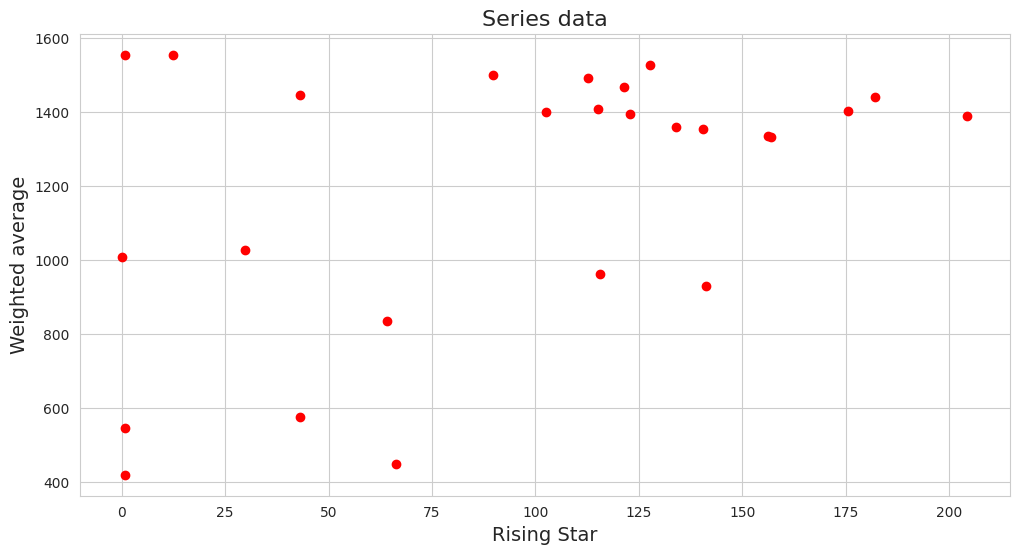

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
plt.scatter(weight, rise, color="red")
plt.xlabel("Rising Star", fontsize=14)
plt.ylabel("Weighted average", fontsize=14)
plt.title("Series data", fontsize=16)
plt.show()

In [45]:
Batsmen=pd.DataFrame({"Weight":weight,"rise":rise,"tmp_id":series})

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


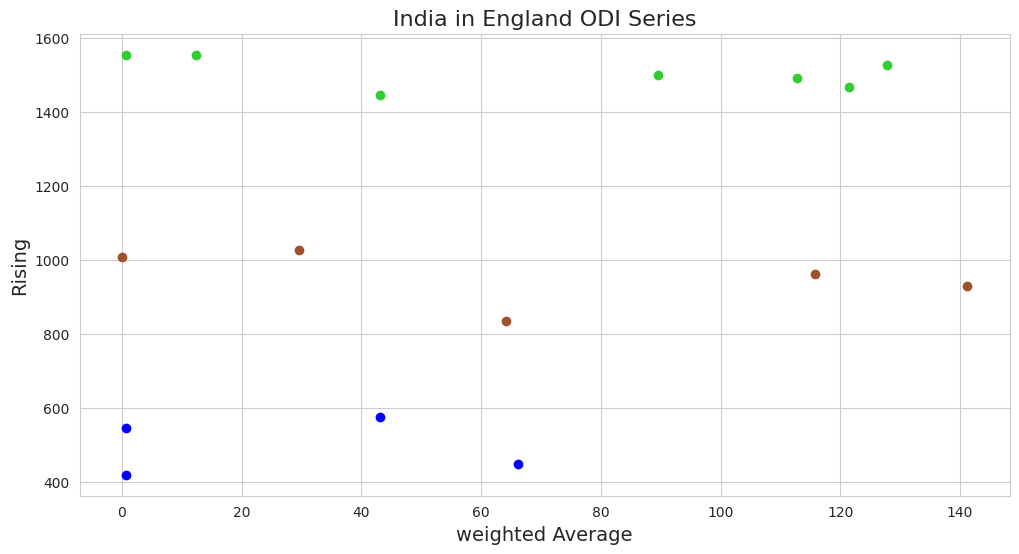

In [46]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(Batsmen[["Weight", "rise"]])
Batsmen["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12,6))

colors = ["blue", "sienna", "limegreen", "red", "black"]

for r in range(1,6):
    clustered_Batsmen = Batsmen[Batsmen["cluster"] == r]
    plt.scatter(clustered_Batsmen["Weight"], clustered_Batsmen["rise"], color=colors[r-1])
    
plt.title(seri, fontsize=16)
plt.xlabel("weighted Average", fontsize=14)
plt.ylabel("Rising", fontsize=14)
    
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


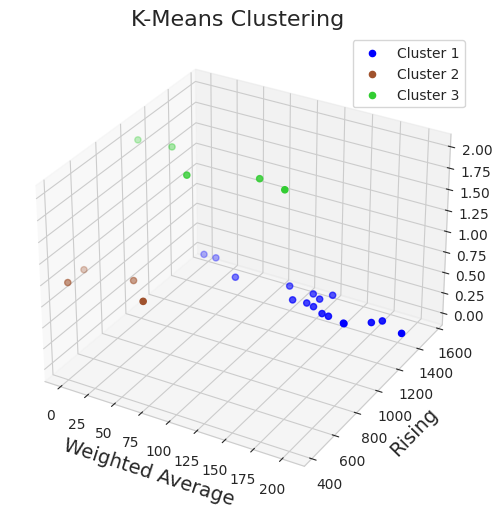

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting module

# Assuming you have a DataFrame named Bowler with columns "Weight", "rise", and "cluster"

kmeans = KMeans(n_clusters=3)
kmeans.fit(Batsmen[["Weight", "rise"]])
Batsmen["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')  # Creating a 3D subplot

colors = ["blue", "sienna", "limegreen"]

for r in range(3):  # Adjusted loop range to match the number of clusters
    clustered_Batsmen = Batsmen[Batsmen["cluster"] == r]
    ax.scatter(clustered_Batsmen["Weight"], clustered_Batsmen["rise"], zs=r, color=colors[r], label=f'Cluster {r+1}')

ax.set_title("K-Means Clustering ", fontsize=16)
ax.set_xlabel("Weighted Average", fontsize=14)
ax.set_ylabel("Rising", fontsize=14)
ax.set_zlabel(" ", fontsize=14)

plt.legend()
plt.show()


In [48]:
# Batsmen = Batsmen.rename(columns={"Player_names": "Player_Id"})
Batsmen = Batsmen.sort_values(by ='cluster' )
Batsmen.head()

,Weight,rise,tmp_id,cluster
0,89.625957,1501,0,0
23,182.073294,1440,23,0
22,115.159175,1407,22,0
21,43.162350,1445,21,0
20,0.666600,1555,20,0


<Axes: >

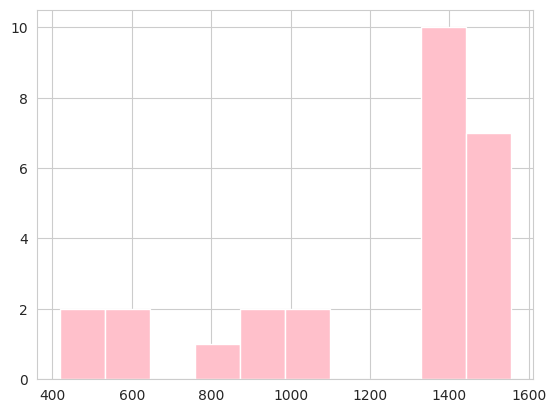

In [49]:
Batsmen["rise"].hist(color="pink")

<Axes: >

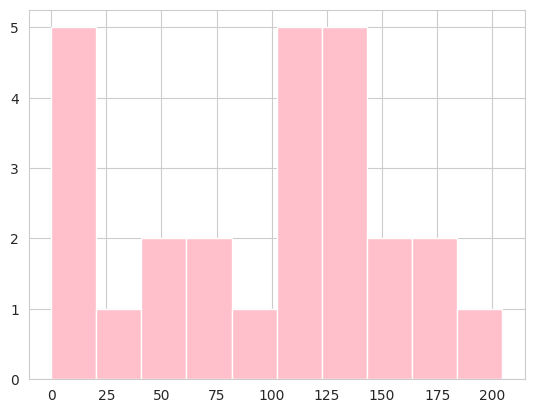

In [50]:
Batsmen["Weight"].hist(color="pink")

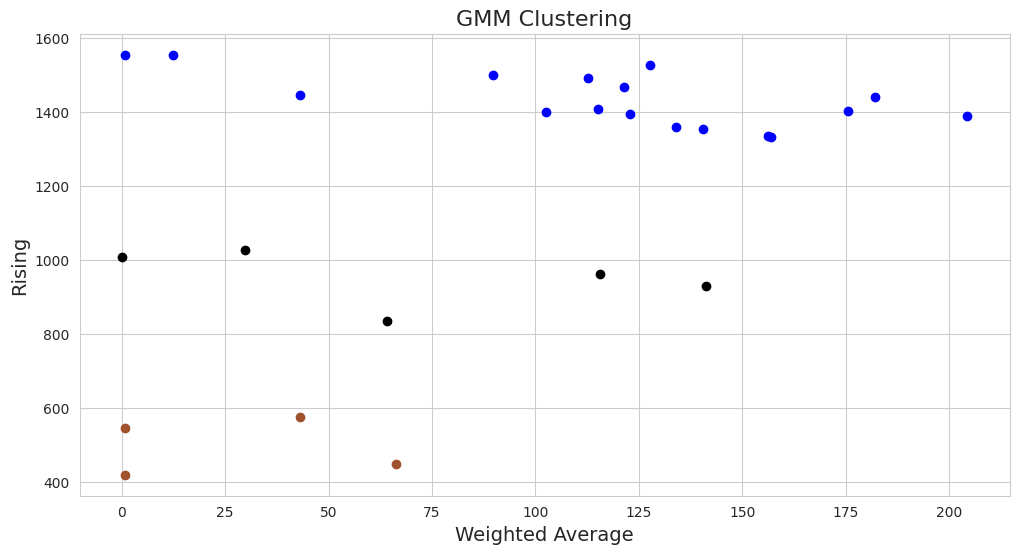

In [51]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

gmm = GaussianMixture(n_components=3)
gmm.fit(Batsmen[["Weight", "rise"]])

# Predict the clusters for each data point
Batsmen["cluster"] = gmm.predict(Batsmen[["Weight", "rise"]])

# Visualize the clusters
fig = plt.figure(figsize=(12, 6))

colors = ["blue", "sienna", "limegreen", "red", "black"]

for r in range(5):
    clustered_Batsmen = Batsmen[Batsmen["cluster"] == r]
    plt.scatter(clustered_Batsmen["Weight"], clustered_Batsmen["rise"], color=colors[r-1])

plt.title("GMM Clustering", fontsize=16)
plt.xlabel("Weighted Average", fontsize=14)
plt.ylabel("Rising", fontsize=14)

plt.show()


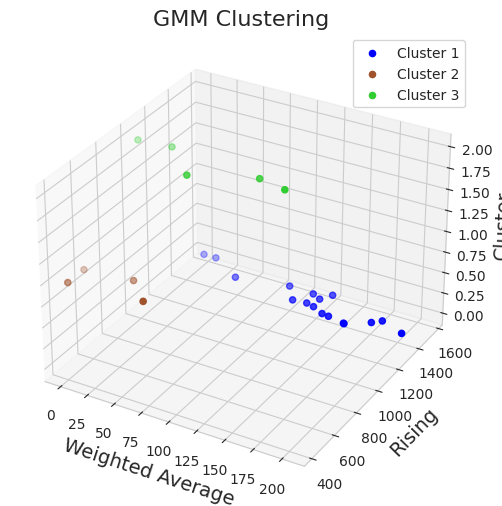

In [52]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting module

# Assuming you have a DataFrame named Batsmen with columns "Weight", "rise", and "cluster"

gmm = GaussianMixture(n_components=3)
gmm.fit(Batsmen[["Weight", "rise"]])
Batsmen["cluster"] = gmm.predict(Batsmen[["Weight", "rise"]])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')  # Creating a 3D subplot

colors = ["blue", "sienna", "limegreen"]

for r in range(3):
    clustered_Batsmen = Batsmen[Batsmen["cluster"] == r]
    ax.scatter(clustered_Batsmen["Weight"], clustered_Batsmen["rise"], zs=r, color=colors[r], label=f'Cluster {r+1}')

ax.set_title("GMM Clustering", fontsize=16)
ax.set_xlabel("Weighted Average", fontsize=14)
ax.set_ylabel("Rising", fontsize=14)
ax.set_zlabel("Cluster", fontsize=14)

plt.legend()
plt.show()


# Batman which have best Performance
# Ranking is in the order of index no.

In [53]:
Players_batsmen = pd.DataFrame({"Player":player,"tmp_id":series})

Batsmen = Batsmen[Batsmen.columns].merge(Players_batsmen)
Batsmen.head(5)

,Weight,rise,tmp_id,cluster,Player
0,89.625957,1501,0,0,V Kohli
1,182.073294,1440,23,0,RA Jadeja
2,115.159175,1407,22,0,CR Woakes
3,43.162350,1445,21,0,JM Anderson
4,0.666600,1555,20,0,Mohammed Shami


# Bowling Domain

In [54]:
def rising_bow(l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11):
    re=[]
    for i in range(0,len(l1)):
        dd=0
        if(l1==None):
            dd+=0
        else:
            dd+=l1[i]
        if(l2==None):
            dd+=0
        else:
            dd+=l2[i]
        if(l3==None):
            dd+=0
        else:
            dd+=l3[i]
        if(l4==None):
            dd+=0
        else:
            dd+=l4[i]
        if(l5==None):
            dd+=0
        else:
            dd-=l5[i]
        if(l6==None):
            dd+=0
        else:
            dd-=l6[i]
        if(l7==None):
            dd+=0
        else:
            dd-=l7[i]
        if(l8==None):
            dd+=0
        else:
            dd-=l8[i]
        if(l9==None):
            dd+=0
        else:
            dd-=l9[i]
        if(l10==None):
            dd+=0
        else:
            dd-=l10[i]
        if(l11==None):
            dd+=0
        else:
            dd-=l11[i]
        re.append(dd)
    return re

In [55]:
def master_bow(matchid,score_card):
    temp=matchid
    players=[]
    runs=[]
    fow_batting=[]
    ball_faced=[]
    match_id=[]
    inig=[]
    runs_conceded=[]
    over_bowled=[]
    wicket_taken=[]
    wicket_fall=[]
    for x,y in enumerate(score_card["Match_id"]):

        if(temp==y):
            inig.append(score_card["Innings"][x])
            match_id.append(score_card["Match_id"][x])
            players.append(score_card["Player_name"][x])
            runs.append(score_card["Runs_Scored"][x])
            fow_batting.append(score_card["FOW_batting_number"][x])
            ball_faced.append(score_card["Balls_faced"][x])
            runs_conceded.append(score_card["Runs_conceded"][x])
            over_bowled.append(score_card["Overs_bowled"][x])
            wicket_taken.append(score_card["Wickets_taken"][x])
            wicket_fall.append(score_card["FOW_batting_number"][x])

    dataframe=pd.DataFrame({"Match_id":match_id,"Innings":inig,"Player_name":players,"Runs_Scored":runs,"FOW_batting_number":fow_batting,"Balls_faced":ball_faced,"Runs_conceded":runs_conceded,"Overs_bowled":over_bowled,"Wickets_taken":wicket_taken})
#     print(inig,match_id)
#     print(temp)
#     print(runs)
#     print(wicket_fall)
#     print("------------")
    if(len(runs)==0 or len(wicket_fall)==0):
        s=0
    else:
        if(len(wicket_fall)>20):
            first_inn_score=sum(runs[:12])
            second_inn_score=sum(runs[12:])
            wicketfal_one=max(wicket_fall[:12])
            wicketfal_two=max(wicket_fall[12:])
#             print(temp)
#             print("first_inn_score  ",first_inn_score)
#             print("second_inn_score ",second_inn_score)
#             print("wicketfal_one    ",wicketfal_one)
#             print("wicketfal_two    ",wicketfal_two)
#             print("Weighted Average Batsman")

            rsbow_1=team_wl_bow(dataframe,info_card)
            rsbow_2=opp_team_eco_bow(dataframe)
            rsbow_3=opp_team_average_bow(dataframe)
            rsbow_4=oppo_team_strike_bow(dataframe)
            rsbow_5=co_bowler_bow(dataframe)
            rsbow_6=co_bowler_eco(dataframe)
            rsbow_7=co_bowler_str(dataframe)
            rsbow_8=team_average(dataframe)
            rsbow_9=team_eco_bow(dataframe)
            rsbow_10=team_strike_rate(dataframe)
            rsbow_11=oppo_team_wl(dataframe,info_card)
            
            rising_star_bow=rising_bow(rsbow_1,rsbow_2,rsbow_3,rsbow_4,rsbow_5,rsbow_6,rsbow_7,rsbow_8,rsbow_9,rsbow_10,rsbow_11)
            #print(rising_star_bow)
            rrr_bow=(wei_avg_bow(dataframe))

            for x in range(0,len(rrr_bow)):
                if(rrr_bow[x]!=None or rrr_bow[x]!='-inf'):
                    rrr_bow[x].append(rising_star_bow[x])
            
            return rrr_bow
            

# Data Preprocessing Bowler Domain

In [56]:
series_bow=[]
id_bow=[]
players_bow=[]
for i in masters:
    print("On the way")
    ids=[]
    ser=[]
    player=[]
    for j in i[1]:
        
        ids.append(j)
        ser.append(i[0])
        
        player.append(master_bow(j,score_card))
        
    series_bow.append(ser)
    id_bow.append(ids)
    players_bow.append(player)
    
print("All Done")

On the way


/tmp/ipykernel_41/3308594255.py:21: RuntimeWarning: invalid value encountered in scalar divide
  co_bow_average.append([i,runs/wicket])
/tmp/ipykernel_41/3308594255.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  co_bow_average.append([i,runs/wicket])
/tmp/ipykernel_41/3308594255.py:31: RuntimeWarning: invalid value encountered in scalar divide
  co_bow_economy.append([i,(wicket/runs)])
/tmp/ipykernel_41/3308594255.py:41: RuntimeWarning: invalid value encountered in scalar divide
  co_bow_strike.append([i,(runs/wicket)*6])
/tmp/ipykernel_41/3308594255.py:41: RuntimeWarning: divide by zero encountered in scalar divide
  co_bow_strike.append([i,(runs/wicket)*6])


On the way
On the way
On the way
On the way
On the way
On the way


/tmp/ipykernel_41/3785388419.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  team_economy.append([id,(one_inn/one_over_bowled),(two_inn/two_over_bowled)])


On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way


/tmp/ipykernel_41/1478025458.py:40: RuntimeWarning: invalid value encountered in scalar subtract
  dd-=l9[i]


On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way


/tmp/ipykernel_41/3308594255.py:31: RuntimeWarning: divide by zero encountered in scalar divide
  co_bow_economy.append([i,(wicket/runs)])


On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
On the way
All Done


In [57]:
for i in range(0,len(players_bow)):
    for x,y in enumerate(players_bow[i]):
#         if(players[i][x]!=None):
#             print(players[i][x][0])
        if(players_bow[i][x]!=None):
            for g in range(0,len(players_bow[i][x])):
                players_bow[i][x][g].append(id_bow[i][x])

In [58]:
import numpy as np

In [59]:
master_series=[]
master_id=[]
master_player=[]
for u,w in enumerate(series_bow):
#     print(len(w),len(id[u]),len(players[u]))
    normal=[]
    values=[]
    values_rs=[]
    id_s=[]
    for i in players_bow[u]:
        if(i!=None):
            for j in i:
                normal.append(j[0])
                id_s.append(j[3])
                values_rs.append(j[2])
                if(str(j[1])=='nan'):
                    values.append(0)
                else:
                    values.append(float(j[1]))
    uniq_normal=set(normal)
    final=[]
    for i,j in enumerate(uniq_normal):
        val=0
        val_rs=0
        idf=[]
        for x,y in enumerate(normal):
            if(j==y):
                val+=values[x]
                val_rs+=values_rs[x]
                idf.append(id_s[x])

        final.append([j,val,val_rs,idf])
#     master_series.append(j)
#     master_id.append(p for p in id[u])
#     master_player.append(b for b in final)
    for i in range(0,len(final)):
        master_player.append(final[i])
        master_series.append(w[0])
        master_id.append(id_bow[u])

/tmp/ipykernel_41/3060294652.py:29: RuntimeWarning: invalid value encountered in scalar add
  val_rs+=values_rs[x]


In [60]:
seri=[]
play=[]
wei_av=[]
rs=[]
i_d=[]
for i in range(len(master_player)):
#     print(master_player[i])
    seri.append(master_series[i])
    play.append(master_player[i][0])

    wei_av.append((master_player[i][1]))
    
    rs.append((master_player[i][2]))
    i_d.append(master_player[i][3])

In [61]:
final_data=pd.DataFrame({"Series":seri,"Player":play,"Weighted Average":wei_av,"Rising star":rs,"ID Playes":i_d})

# Final Data Bowling Domain

In [62]:
final_data

,Series,Player,Weighted Average,Rising star,ID Playes
0,Sri Lanka in Zimbabwe ODI Series,T Taibu,0.0,-178.366480,"[375456, 375460, 375462]"
1,Sri Lanka in Zimbabwe ODI Series,RW Price,-26.0,-189.366480,"[375456, 375460, 375462]"
2,Sri Lanka in Zimbabwe ODI Series,CK Kapugedera,0.0,-228.754949,"[375456, 375460, 375462]"
3,Sri Lanka in Zimbabwe ODI Series,SHT Kandamby,0.0,-58.195425,[375462]
4,Sri Lanka in Zimbabwe ODI Series,CB Mpofu,0.0,-47.100000,[375456]
...,...,...,...,...,...
10519,Ireland Tri-Nation Series,JDS Neesham,0.0,-122.956522,[1033371]
10520,Ireland Tri-Nation Series,Sabbir Rahman,0.0,-350.743478,"[1033367, 1033371]"
10521,Ireland Tri-Nation Series,Sunzamul Islam,-7.0,-220.200000,[1033367]
10522,Ireland Tri-Nation Series,LRPL Taylor,0.0,-116.956522,[1033371]


In [63]:
# Data export
#GFG = pd.ExcelWriter('finaldata_bow.xlsx') 
#final_data.to_excel(GFG, index = False) 
  
#GFG.save() 

# Machine Learning - Clustring

In [64]:
seri=str(input())         # Eg. India in England ODI Series, West Indies Women in Australia ODI Series
weight=[]
rise=[]
player=[]

for i in range(0,len(final_data["Weighted Average"])):
    if(final_data["Series"][i]==seri):
        weight.append(final_data["Weighted Average"][i])
        rise.append(final_data["Rising star"][i])
        player.append(final_data["Player"][i])
        
      
series=[]
for i in range(0,len(weight)):
    series.append(i)

 India in England ODI Series


In [65]:
import seaborn as sns

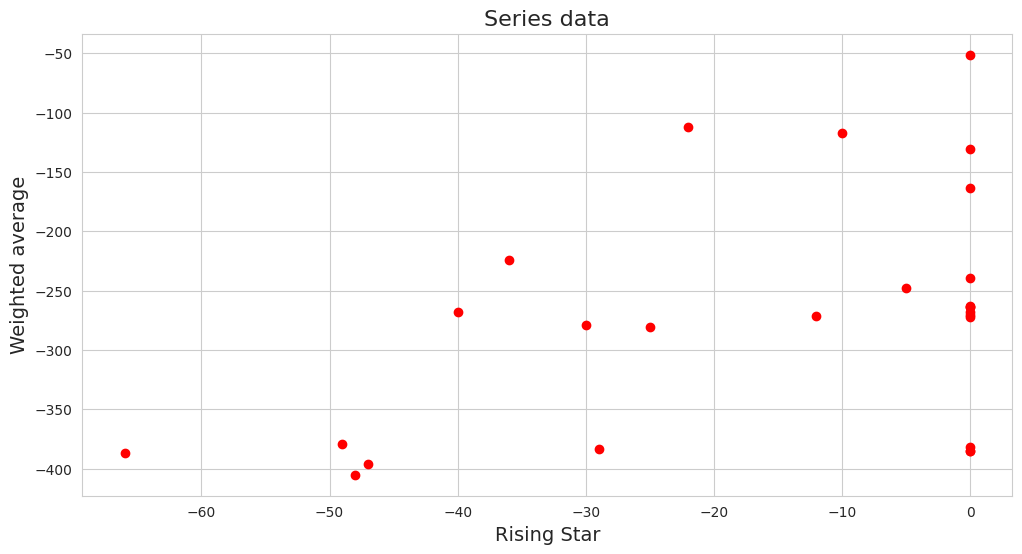

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
plt.scatter(weight, rise, color="red")
plt.xlabel("Rising Star", fontsize=14)
plt.ylabel("Weighted average", fontsize=14)
plt.title("Series data", fontsize=16)
plt.show()

In [67]:
Bowler=pd.DataFrame({"Weight":weight,"rise":rise,"tmp_id":series})

In [68]:
silhouete_avg = 0.8091440888434509

<Axes: >

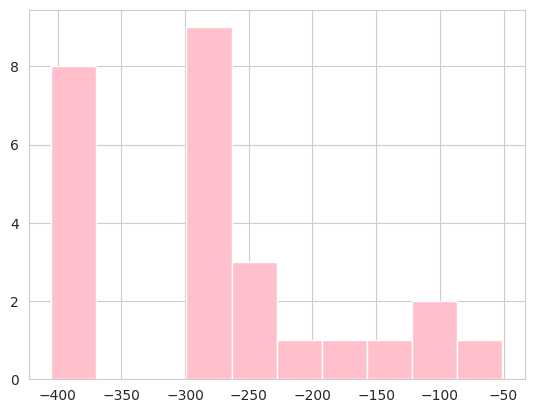

In [69]:
Bowler["rise"].hist(color="pink")

<Axes: >

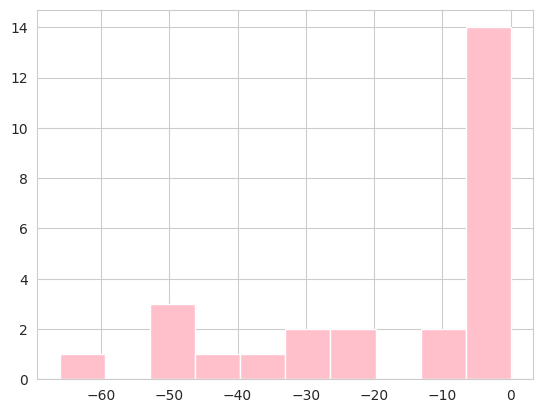

In [70]:
Bowler["Weight"].hist(color="pink")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


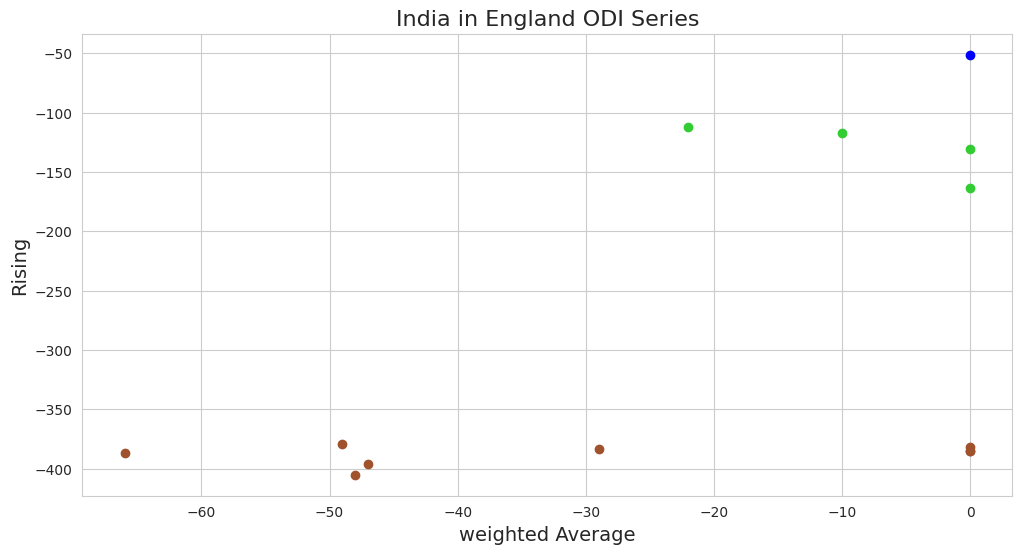

In [71]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(Bowler[["Weight", "rise"]])
Bowler["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12,6))

colors = ["blue", "sienna", "limegreen", "red", "black"]

for r in range(1,6):
    clustered_Batsmen = Bowler[Bowler["cluster"] == r]
    plt.scatter(clustered_Batsmen["Weight"], clustered_Batsmen["rise"], color=colors[r-1])
    
plt.title(seri, fontsize=16)
plt.xlabel("weighted Average", fontsize=14)
plt.ylabel("Rising", fontsize=14)
    
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


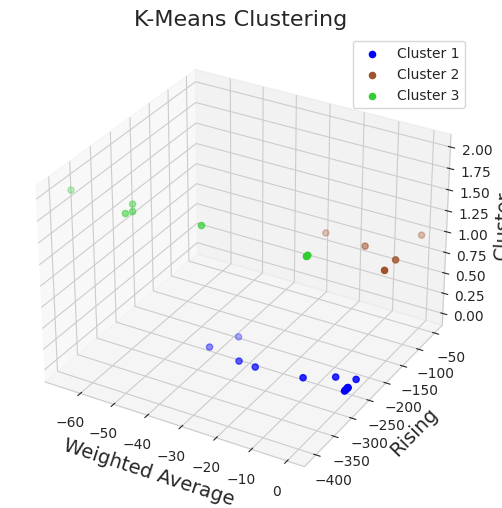

In [72]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting module

# Assuming you have a DataFrame named Bowler with columns "Weight", "rise", and "cluster"

kmeans = KMeans(n_clusters=3)
kmeans.fit(Bowler[["Weight", "rise"]])
Bowler["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')  # Creating a 3D subplot

colors = ["blue", "sienna", "limegreen"]

for r in range(3):  # Adjusted loop range to match the number of clusters
    clustered_Batsmen = Bowler[Bowler["cluster"] == r]
    ax.scatter(clustered_Batsmen["Weight"], clustered_Batsmen["rise"], zs=r, color=colors[r], label=f'Cluster {r+1}')

ax.set_title("K-Means Clustering", fontsize=16)
ax.set_xlabel("Weighted Average", fontsize=14)
ax.set_ylabel("Rising", fontsize=14)
ax.set_zlabel("Cluster", fontsize=14)

plt.legend()
plt.show()


In [73]:
# Batsmen = Batsmen.rename(columns={"Player_names": "Player_Id"})
Bowler = Bowler.sort_values(by ='cluster' )
Bowler.head()

,Weight,rise,tmp_id,cluster
12,0.0,-270.145238,12,0
16,-5.0,-247.913866,16,0
14,0.0,-267.617087,14,0
13,0.0,-272.617087,13,0
24,-25.0,-280.617087,24,0


# Bowlers which have best Performance
# Ranking is in the order of index no.

In [74]:
Players_bowler = pd.DataFrame({"Player":player,"tmp_id":series})

Bowler = Bowler[Bowler.columns].merge(Players_bowler)
Bowler.head(5)

,Weight,rise,tmp_id,cluster,Player
0,0.0,-270.145238,12,0,MM Sharma
1,-5.0,-247.913866,16,0,AT Rayudu
2,0.0,-267.617087,14,0,JC Buttler
3,0.0,-272.617087,13,0,EJG Morgan
4,-25.0,-280.617087,24,0,BA Stokes


In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Specify the number of clusters
num_clusters = 3

# Create and fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
Bowler['cluster'] = kmeans.fit_predict(Bowler[['Weight', 'rise']])

# Calculate silhouette score for each sample
silhouette_avg = silhouette_score(Bowler[['Weight', 'rise']], Bowler['cluster'])
print(f"Silhouette Score for the data: {silhouete_avg}")

Silhouette Score for the data: 0.8091440888434509


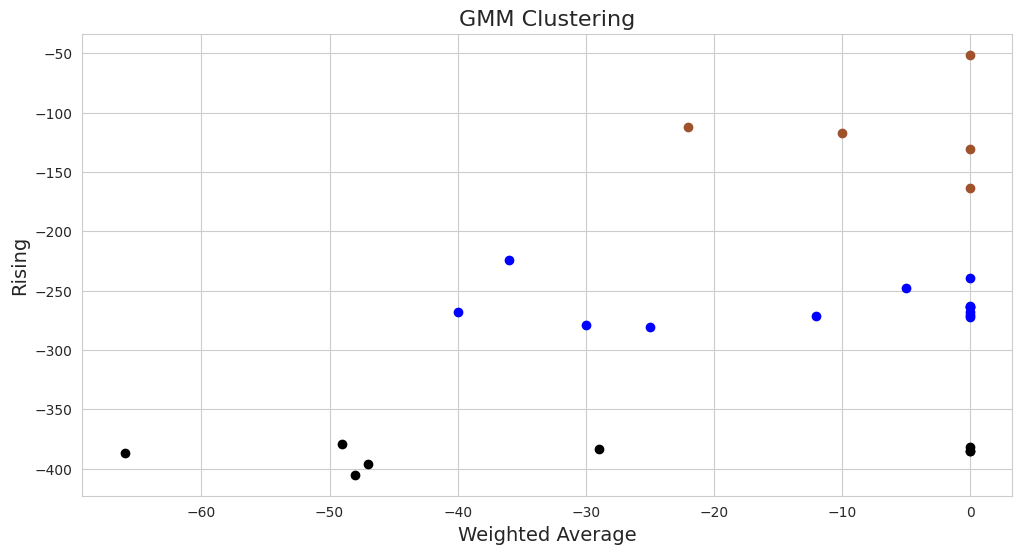

In [76]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

gmm = GaussianMixture(n_components=3)
gmm.fit(Bowler[["Weight", "rise"]])

# Predict the clusters for each data point
Bowler["cluster"] = gmm.predict(Bowler[["Weight", "rise"]])

# Visualize the clusters
fig = plt.figure(figsize=(12, 6))

colors = ["blue", "sienna", "limegreen", "red", "black"]

for r in range(5):
    clustered_Bowlers = Bowler[Bowler["cluster"] == r]
    plt.scatter(clustered_Bowlers["Weight"], clustered_Bowlers["rise"], color=colors[r-1])

plt.title("GMM Clustering", fontsize=16)
plt.xlabel("Weighted Average", fontsize=14)
plt.ylabel("Rising", fontsize=14)

plt.show()


In [77]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

data = pd.read_csv('/content/final_data_bowling.csv')

reader = Reader(rating_scale=(-float('inf'), float('inf')))


surprise_data = Dataset.load_from_df(data[['Player', 'Series', 'Weighted Average']], reader)

trainset, testset = train_test_split(surprise_data, test_size=0.25)

model_cf = SVD()

model_cf.fit(trainset)

predictions = model_cf.test(testset)


accuracy.rmse(predictions)
accuracy.mae(predictions)


FileNotFoundError: [Errno 2] No such file or directory: '/content/final_data_bowling.csv'